In [6]:
import numpy as np
import pandas as pd
from fairness import *
import pickle


with open('repair_label_wise_result.pkl', 'rb') as file:
    RES = pickle.load(file)

tasks = [ 'Fodors-Zagat','DBLP-GoogleScholar', 'iTunes-Amazon', 'Walmart-Amazon', 'Amazon-Google','Beer','DBLP-ACM']
tasks = [ 'Amazon-Google', 'iTunes-Amazon', 'Walmart-Amazon','DBLP-ACM']
models = ['deepmatcher', 'DITTO', 'HierGAT','EMTransformer']



with open('saved_params/repair_result.pkl', 'rb') as file:
    RES_orig = pickle.load(file)

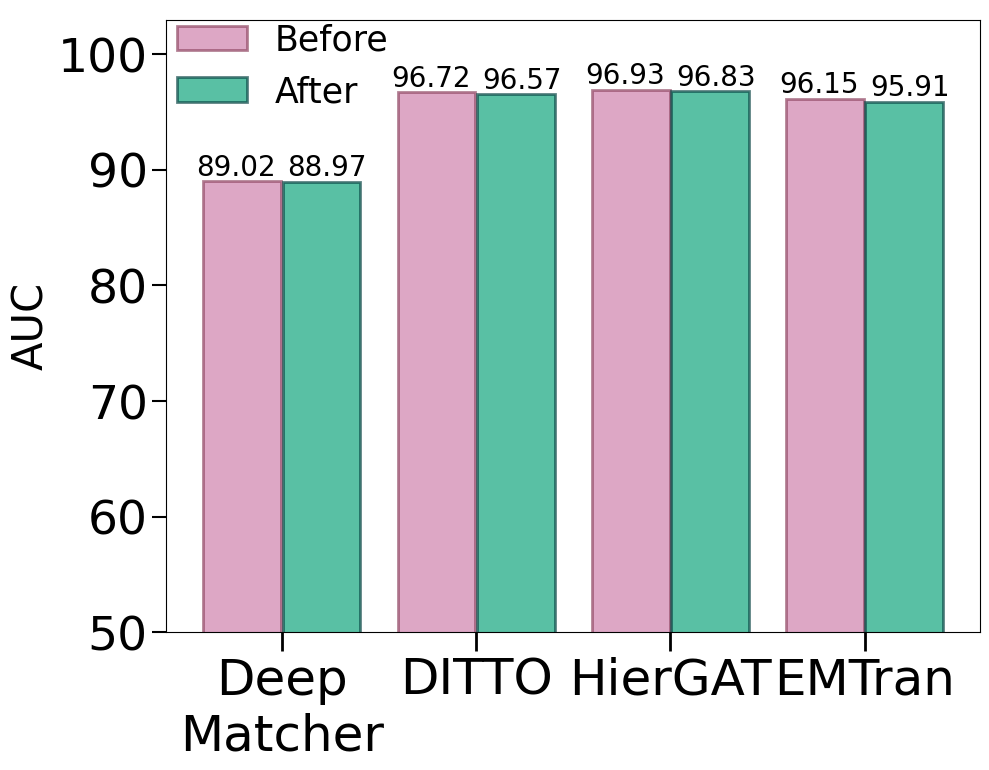

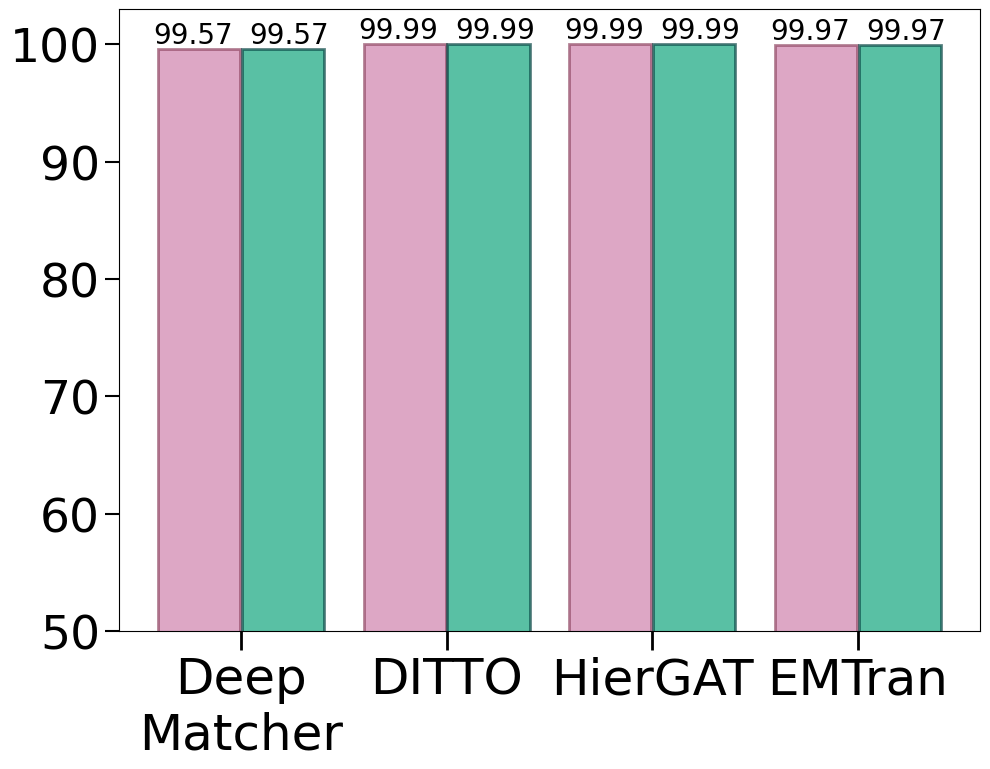

In [60]:
import matplotlib.pyplot as plt
import numpy as np

from fig_params import *

# Sample data
x_labels = ['Deep\nMatcher','DITTO','HierGAT','EMTran']
# x_labels = ['M1','M2','M3','M4']
bar_width = 0.4  # Width of each bar

# X positions for groups
x = np.arange(len(x_labels))


for task in tasks:
 
    if task not in [ 'Amazon-Google', 'DBLP-ACM']: continue
    # if task == 'Walmart-Amazon':
    #     plt.figure(figsize= (11, 7.8))
        
        
    # else:
    plt.figure(figsize= bar_fig_size)
    
    L = bar_border_l
    Y = []
    for model in models:
        Y.append(RES_orig['m2'][model][task]['before']['AUC'])
        # a = RES[task][model]['EOD_min']['before']['auc']
        # b = RES[task][model]['EO_min']['before']['auc']
        # Y.append(min(a,b))
        # if a != b : print('sadnf')

    bars= plt.bar(x - bar_width/2-0.004, Y, width=bar_width,color = "#CC79A7",alpha = fig_alpha,   edgecolor=None, label = 'Before')


    for bar in bars:
        bar.set_edgecolor('#8A3F5B')
        bar.set_linewidth(L)  # Adjust border thickness




    for bar in bars:
        yval = bar.get_height()
        if yval == 100:
            plt.text(bar.get_x() + bar.get_width() / 2-0 - .03, yval , f'{yval:.0f}', ha='center', va='bottom' , fontsize = 20, rotation = 0)
        else:
            plt.text(bar.get_x() + bar.get_width() / 2-0 - .03, yval, f'{yval:.2f}', ha='center', va='bottom' , fontsize = 20, rotation = 0)






    Y = []
    for model in models:
        # Y.append(RES['m2'][model][task]['after']['AUC'])
        a = RES[task][model]['EOD_min']['after']['auc']
        b = RES[task][model]['EO_min']['after']['auc']
        Y.append(max(a,b))
    bars = plt.bar(x + 1 * bar_width/2+0.004, Y, width=bar_width,color = "#009E73",alpha = fig_alpha,edgecolor=None,label = 'After')



    for bar in bars:
        bar.set_edgecolor('#003D3D')
        bar.set_linewidth(L)  # Adjust border thickness



    for bar in bars:
        yval = bar.get_height()
        if yval == 100:
            plt.text(bar.get_x() + bar.get_width() / 2-0 + .03, yval , f'{yval:.0f}', ha='center', va='bottom' , fontsize = 20, rotation = 0)
        else:
            plt.text(bar.get_x() + bar.get_width() / 2-0 + 0.03, yval , f'{yval:.2f}', ha='center', va='bottom' , fontsize = 20, rotation = 0)

    plt.yticks(fontsize = bar_yax_F-6)
    if task == 'Amazon-Google':
        plt.legend(fontsize=bar_legend_F - 10, loc='upper left', bbox_to_anchor=(-0.025, 1.045), frameon=False)
        plt.yticks(fontsize = bar_yax_F - 6)

        plt.ylabel('AUC',fontsize = bar_yax_F - 10)

    plt.ylim([50,103])


    plt.xticks(x , x_labels,fontsize = bar_xax_F ,rotation = 0 )
    

    plt.tick_params(axis='y', which='both', length=tick_l, width=tick_w)
    plt.tick_params(axis='x', which='both', length=tick_l_bar, width=tick_w_bar)

    # plt.title(task)
    
    plt.tight_layout()
    plt.savefig('FIGURES/auc_short_'+task+'alg2.pdf')
    # plt.close()



In [33]:
print('-')

-


FIGURES/EOD_short_Amazon-Google.pdf
FIGURES/EOD_short_DBLP-ACM.pdf


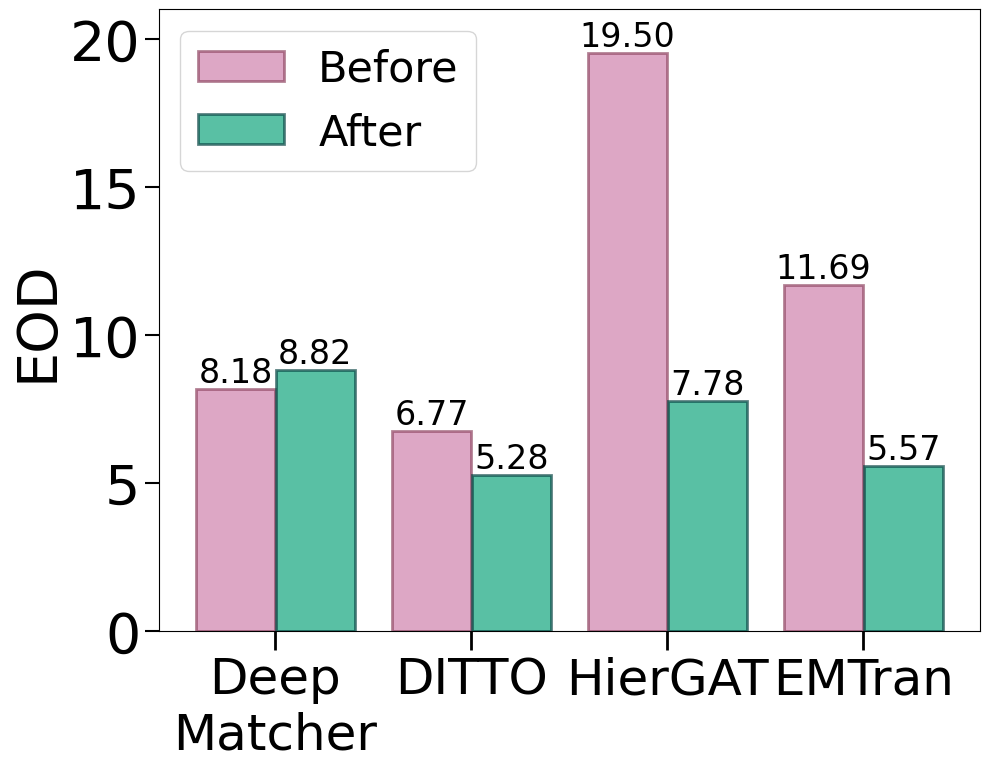

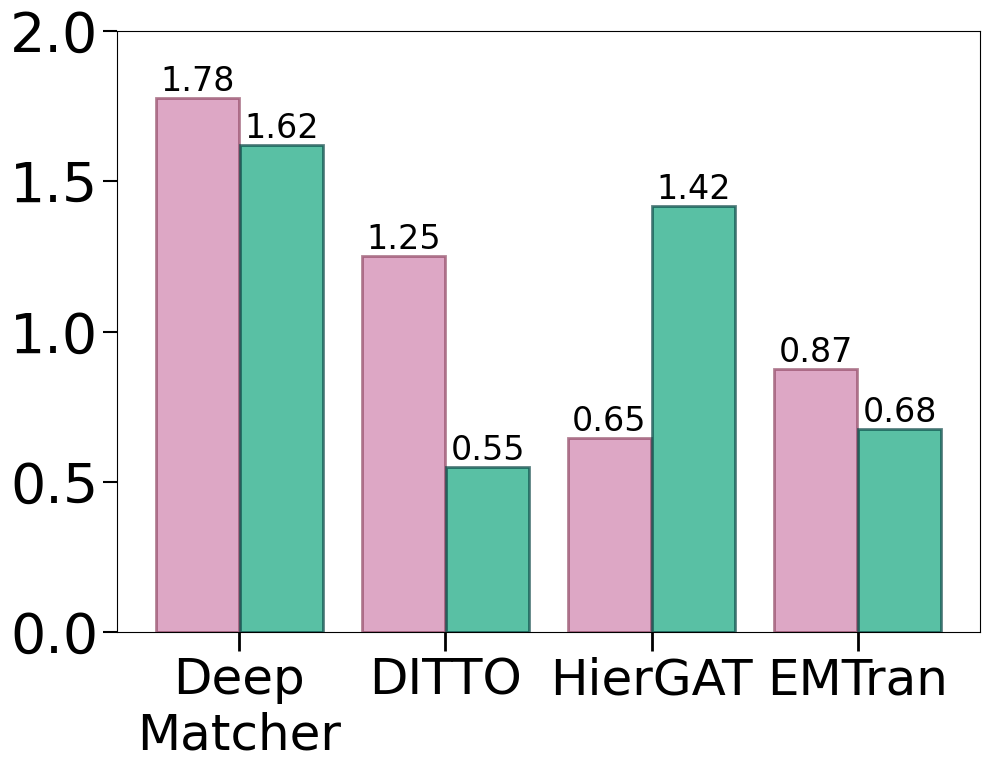

In [2]:
import matplotlib.pyplot as plt
import numpy as np
tasks = [ 'Fodors-Zagat','DBLP-GoogleScholar', 'iTunes-Amazon', 'Walmart-Amazon', 'Amazon-Google','Beer','DBLP-ACM']
tasks = [ 'Amazon-Google', 'DBLP-ACM']

from fig_params import *

# Sample data
x_labels = ['Deep\nMatcher','DITTO','HierGAT','EMTran']
# x_labels = ['M1','M2','M3','M4']
bar_width = 0.4  # Width of each bar

# X positions for groups
x = np.arange(len(x_labels))


for task in tasks:

    plt.figure(figsize= bar_fig_size)
    
    L = bar_border_l
    Y = []
    for model in models:
        Y.append(RES_orig['m2'][model][task]['before']['EOD'])
                # a = RES[task][model]['EOD_min']['after']['auc']
        # b = RES[task][model]['EOD_min']['before']['EOD']
        # Y.append(b)
    bars= plt.bar(x - bar_width/2-0.004, Y, width=bar_width,color = "#CC79A7",alpha = fig_alpha,   edgecolor=None, label = 'Before')


    for bar in bars:
        bar.set_edgecolor('#8A3F5B')
        bar.set_linewidth(L)  # Adjust border thickness




    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize = 24)






    Y = []
    for model in models:
        # Y.append(RES['m2'][model][task]['after']['EOD'])
        a = RES[task][model]['EOD_min']['after']['EOD']
        # b = RES[task][model]['EO_min']['after']['auc']
        Y.append(a)
    bars = plt.bar(x + 1 * bar_width/2+0.004, Y, width=bar_width,color = "#009E73",alpha = fig_alpha,edgecolor=None,label = 'After')



    for bar in bars:
        bar.set_edgecolor('#003D3D')
        bar.set_linewidth(L)  # Adjust border thickness



    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom' , fontsize = 24)


    
    if task not in ['DBLP-ACM']:    
        y_ticks = plt.yticks()[0]
        half_y_ticks = y_ticks[::2]  # Select every other y-tick
        plt.yticks(half_y_ticks)
    else:
        
        plt.ylim([0,2])
        y_ticks = plt.yticks()[0]
        half_y_ticks = y_ticks[::2]  # Select every other y-tick
        plt.yticks(half_y_ticks, fontsize=50)

        



    plt.xticks(x , x_labels,fontsize = bar_xax_F ,rotation = 0 )
    plt.yticks(fontsize = bar_yax_F)

    plt.tick_params(axis='y', which='both', length=tick_l, width=tick_w)
    plt.tick_params(axis='x', which='both', length=tick_l_bar, width=tick_w_bar)

    # plt.title(task)
    
    if task == 'Amazon-Google':
        plt.yticks(fontsize = bar_yax_F )

        plt.ylabel('EOD',fontsize = bar_yax_F )
        plt.legend(fontsize =bar_legend_F -4, loc='upper left',) 
        plt.ylim([0,21])

    plt.tight_layout()
    plt.savefig('FIGURES/EOD_short_'+task+'alg2.pdf')
    print('FIGURES/EOD_short_'+task+'.pdf')
    # plt.close()



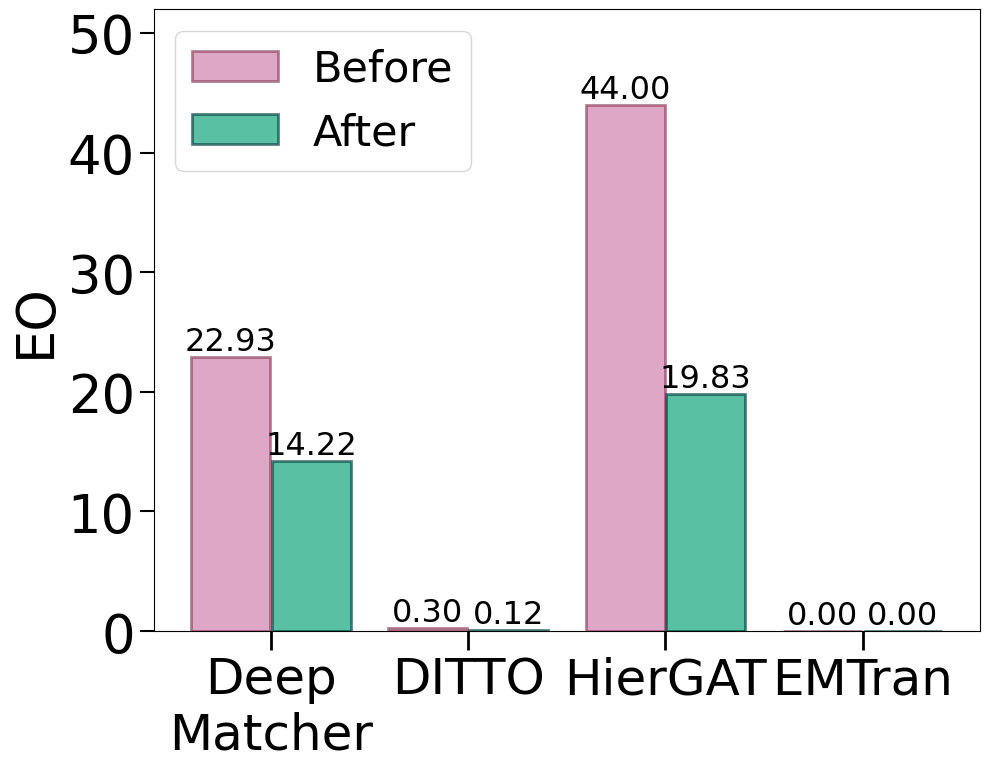

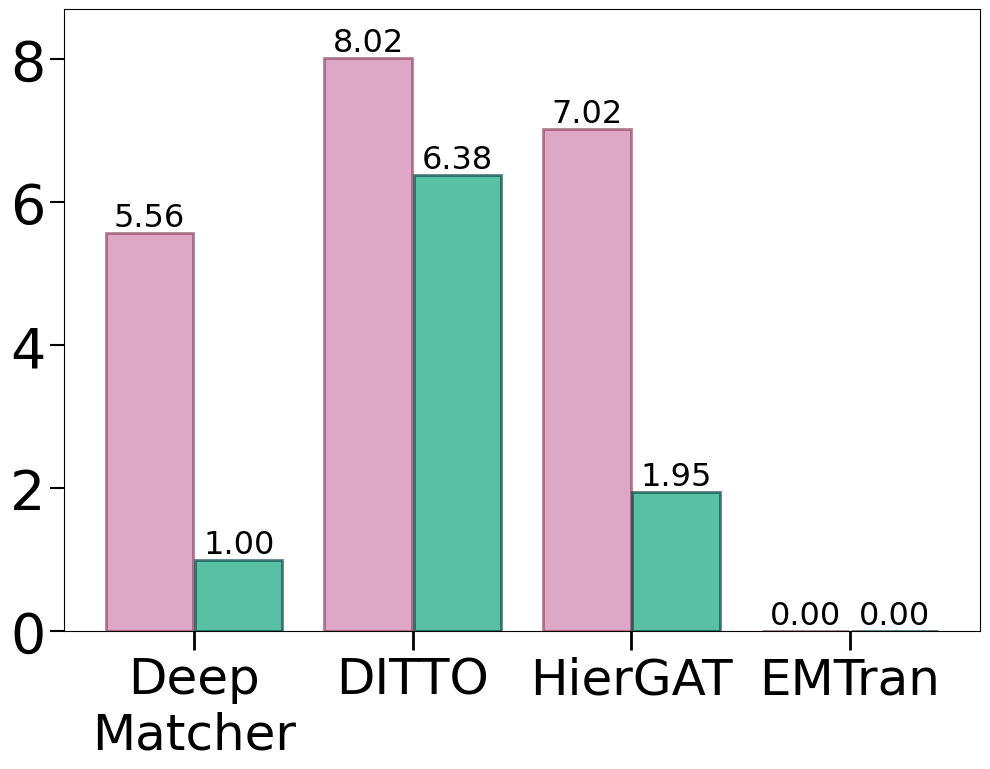

In [61]:
import matplotlib.pyplot as plt
import numpy as np
# tasks = ['Beer', 'DBLP-GoogleScholar', 'iTunes-Amazon', 'Amazon-Google',,'DBLP-ACM']
# tasks = [ 'Amazon-Google', 'DBLP-ACM']

tasks = [ 'Beer', 'Fodors-Zagat']

from fig_params import *

# Sample data
x_labels = ['Deep\nMatcher','DITTO','HierGAT','EMTran']
# x_labels = ['M1','M2','M3','M4']
bar_width = 0.4  # Width of each bar

# X positions for groups
x = np.arange(len(x_labels))


for task in tasks:

    plt.figure(figsize= bar_fig_size)
    
    L = bar_border_l
    Y = []
    for model in models:
        Y.append(RES_orig['m2'][model][task]['before']['EO'])
        # b = RES[task][model]['EO_min']['before']['EO']
        # Y.append(b)

    bars= plt.bar(x - bar_width/2-0.004, Y, width=bar_width,color = "#CC79A7",alpha = fig_alpha,   edgecolor=None, label = 'Before')


    for bar in bars:
        bar.set_edgecolor('#8A3F5B')
        bar.set_linewidth(L)  # Adjust border thickness




    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize = 23)






    Y = []
    for model in models:
        # Y.append(RES['m2'][model][task]['after']['EO'])

        b = RES[task][model]['EO_min']['after']['EO']
        Y.append(b)

    bars = plt.bar(x + 1 * bar_width/2+0.004, Y, width=bar_width,color = "#009E73",alpha = fig_alpha,edgecolor=None,label = 'After')



    for bar in bars:
        bar.set_edgecolor('#003D3D')
        bar.set_linewidth(L)  # Adjust border thickness



    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom' , fontsize = 23)


    
    if task not in ['DBLP-ACM']:  
        if task != 'Beer':  
            y_ticks = plt.yticks()[0]
            half_y_ticks = y_ticks[::2]  # Select every other y-tick
            plt.yticks(half_y_ticks)
    else:
        
        # plt.ylim([0,9])
        # y_ticks = plt.yticks()[0]
        # half_y_ticks = y_ticks[::2]  # Select every other y-tick
        # plt.yticks(half_y_ticks, fontsize=50)
        if task != 'Beer':
            plt.ylim([0,1.8])
            y_ticks = plt.yticks()[0]
            half_y_ticks = y_ticks[::2]  # Select every other y-tick
            plt.yticks(half_y_ticks, fontsize=50)

                



    plt.xticks(x , x_labels,fontsize = bar_xax_F ,rotation = 0 )
    plt.yticks(fontsize = bar_yax_F)

    plt.tick_params(axis='y', which='both', length=tick_l, width=tick_w)
    plt.tick_params(axis='x', which='both', length=tick_l_bar, width=tick_w_bar)

    # plt.title(task)
    
    if task == 'Walmart-Amazon':
        plt.legend(fontsize =bar_legend_F -4, loc='upper right', bbox_to_anchor=(1.021, 1.03)) 
        plt.ylim([0,16.5])
        plt.yticks(fontsize = bar_yax_F )

        plt.ylabel('EO',fontsize = bar_yax_F )


    if task == 'Beer':
        plt.yticks(fontsize = bar_yax_F )

        plt.ylabel('EO',fontsize =  bar_yax_F -2)
        plt.legend(fontsize =bar_legend_F -4, loc='upper left',) 
        plt.ylim([0,52])
        plt.yticks(fontsize = bar_yax_F -2)

    if task == 'Fodors-Zagat':
        plt.ylim([0,8.7])



    plt.tight_layout()
    plt.savefig('FIGURES/EO_short_'+task+'alg2.pdf')
    # plt.close()



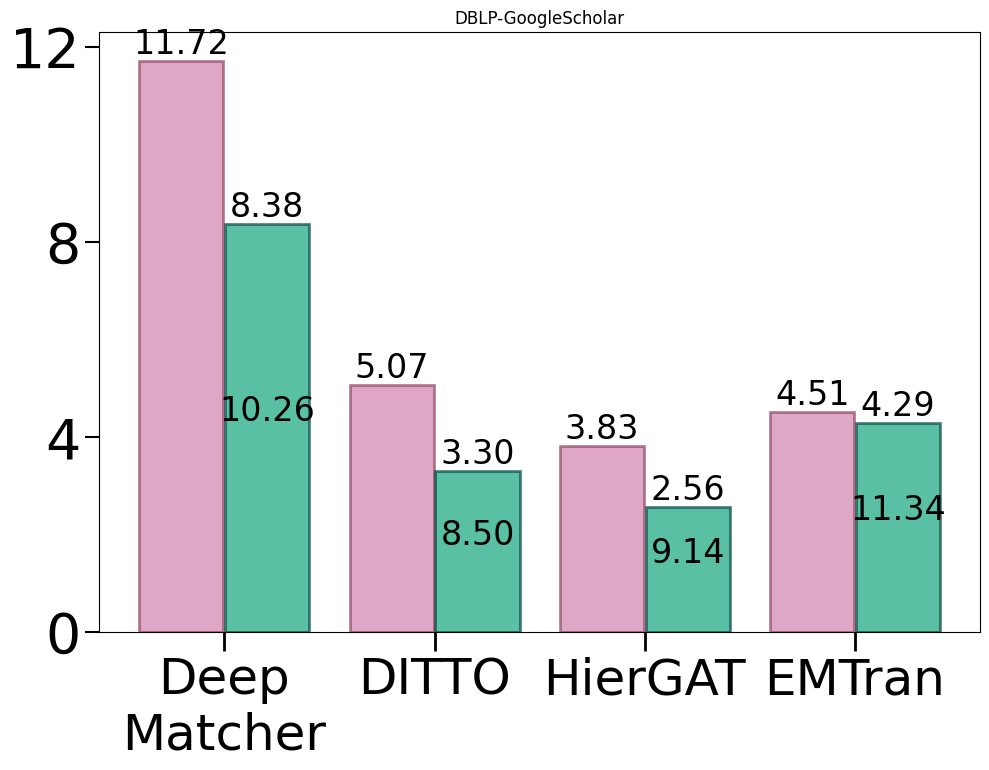

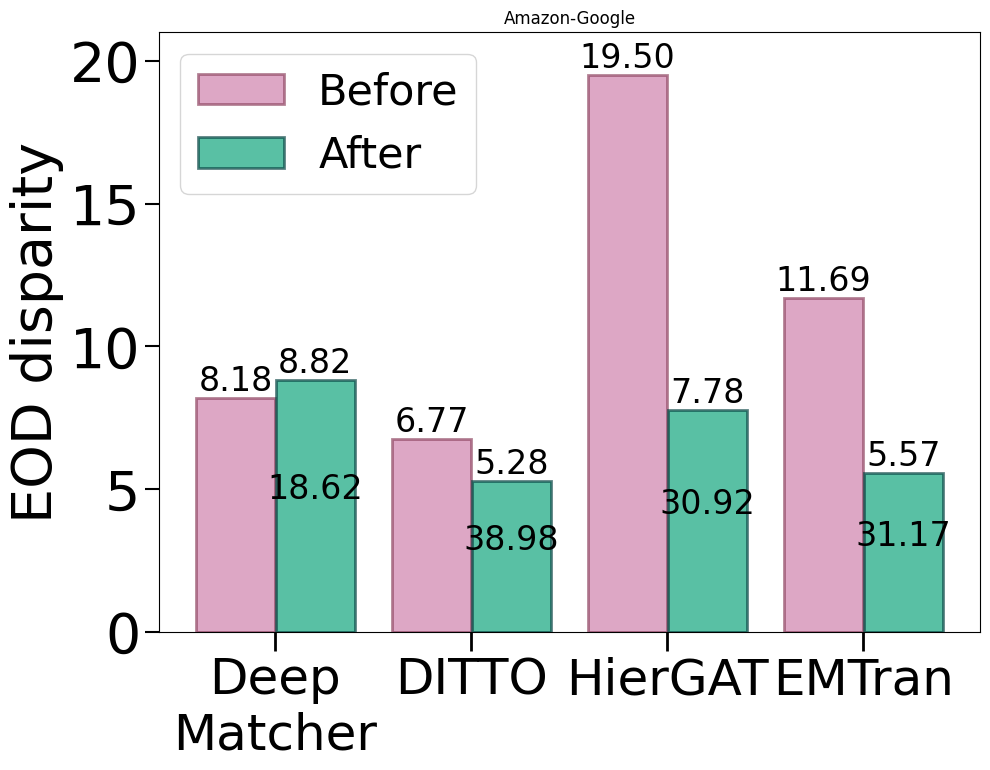

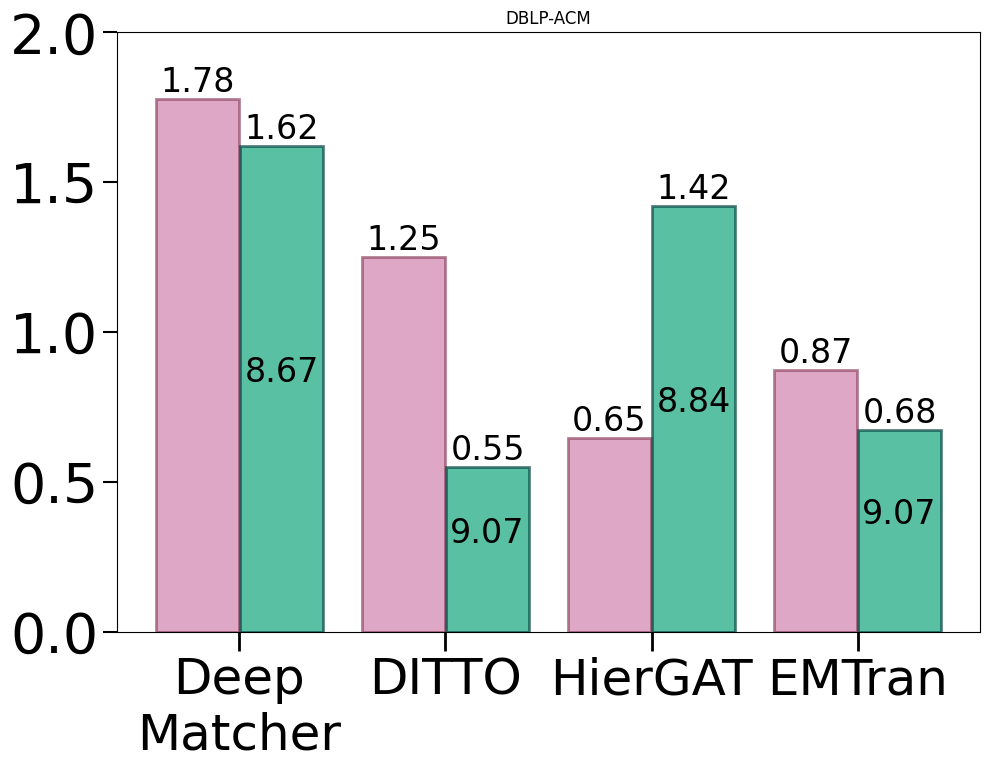

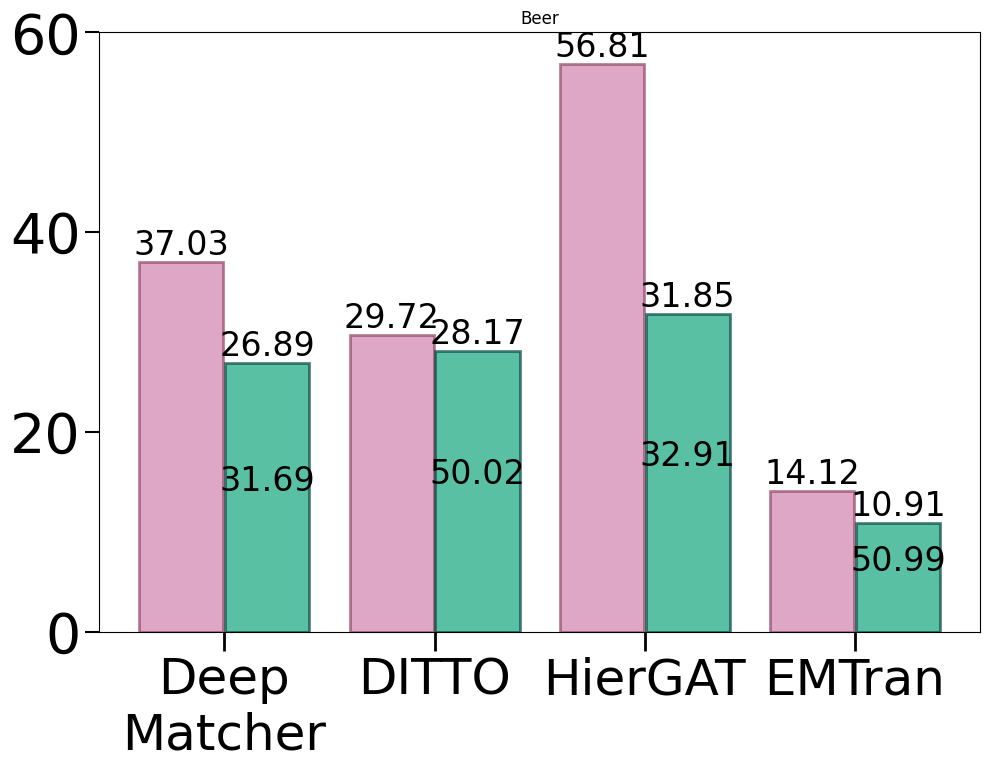

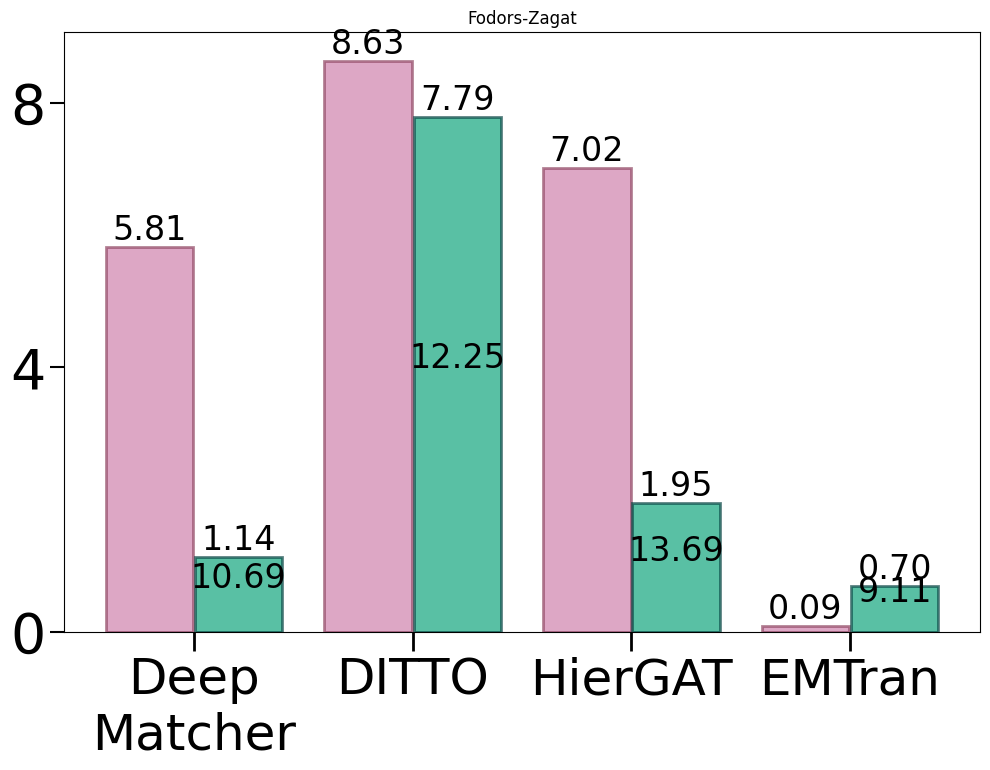

In [21]:
import matplotlib.pyplot as plt
import numpy as np


from fig_params import *
tasks = [ 'Fodors-Zagat','DBLP-GoogleScholar', 'iTunes-Amazon', 'Walmart-Amazon', 'Amazon-Google','Beer','DBLP-ACM']
tasks = [ 'DBLP-GoogleScholar', 'Amazon-Google','DBLP-ACM','Beer']
tasks = [ 'DBLP-GoogleScholar', 'Amazon-Google','DBLP-ACM','Beer','Fodors-Zagat',]

models = ['deepmatcher', 'DITTO', 'EMTransformer', 'HierGAT','HierMatcher']
models = ['deepmatcher', 'DITTO','HierGAT', 'EMTransformer']



# Sample data
x_labels = ['Deep\nMatcher','DITTO','HierGAT','EMTran']
# x_labels = ['M1','M2','M3','M4']
bar_width = 0.4  # Width of each bar

# X positions for groups
x = np.arange(len(x_labels))


for task in tasks:

    plt.figure(figsize= bar_fig_size)
    
    L = bar_border_l
    Y = []
    for model in models:
        Y.append(RES_orig['m2'][model][task]['before']['EOD'])
                # a = RES[task][model]['EOD_min']['after']['auc']
        # b = RES[task][model]['EOD_min']['before']['EOD']
        # Y.append(b)
    bars= plt.bar(x - bar_width/2-0.004, Y, width=bar_width,color = "#CC79A7",alpha = fig_alpha,   edgecolor=None, label = 'Before')


    for bar in bars:
        bar.set_edgecolor('#8A3F5B')
        bar.set_linewidth(L)  # Adjust border thickness




    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize = 24)






    Y = []
    tmp =[]
    for model in models:
        tmp.append(RES_orig['m2'][model][task]['after']['EOD'])
        a = RES[task][model]['EOD_min']['after']['EOD']
        # b = RES[task][model]['EO_min']['after']['auc']
        Y.append(a)
    bars = plt.bar(x + 1 * bar_width/2+0.004, Y, width=bar_width,color = "#009E73",alpha = fig_alpha,edgecolor=None,label = 'After')



    for bar in bars:
        bar.set_edgecolor('#003D3D')
        bar.set_linewidth(L)  # Adjust border thickness



    for i,bar in enumerate(bars):
        yval = bar.get_height()
        yval2 = tmp[i]
        plt.text(bar.get_x() + bar.get_width() / 2, yval/2, f'{yval2:.2f}', ha='center', va='bottom' , fontsize = 24)
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom' , fontsize = 24)


    
    if task not in ['DBLP-ACM']:    
        y_ticks = plt.yticks()[0]
        half_y_ticks = y_ticks[::2]  # Select every other y-tick
        plt.yticks(half_y_ticks)
    else:
        
        plt.ylim([0,2])
        y_ticks = plt.yticks()[0]
        half_y_ticks = y_ticks[::2]  # Select every other y-tick
        plt.yticks(half_y_ticks, fontsize=50)

        



    plt.xticks(x , x_labels,fontsize = bar_xax_F ,rotation = 0 )
    plt.yticks(fontsize = bar_yax_F)

    plt.tick_params(axis='y', which='both', length=tick_l, width=tick_w)
    plt.tick_params(axis='x', which='both', length=tick_l_bar, width=tick_w_bar)

    plt.title(task)
    
    if task == 'Amazon-Google':
        plt.yticks(fontsize = bar_yax_F )

        plt.ylabel('EOD disparity',fontsize = bar_yax_F )
        plt.legend(fontsize =bar_legend_F -4, loc='upper left',) 
        plt.ylim([0,21])

    plt.tight_layout()
    # plt.savefig('FIGURES/EOD_short_'+task+'alg2.pdf')
    # print('FIGURES/EOD_short_'+task+'.pdf')
    # plt.close()

